In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [9]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print("Most Recent Date:", most_recent_date.date)

Most Recent Date: 2017-08-23


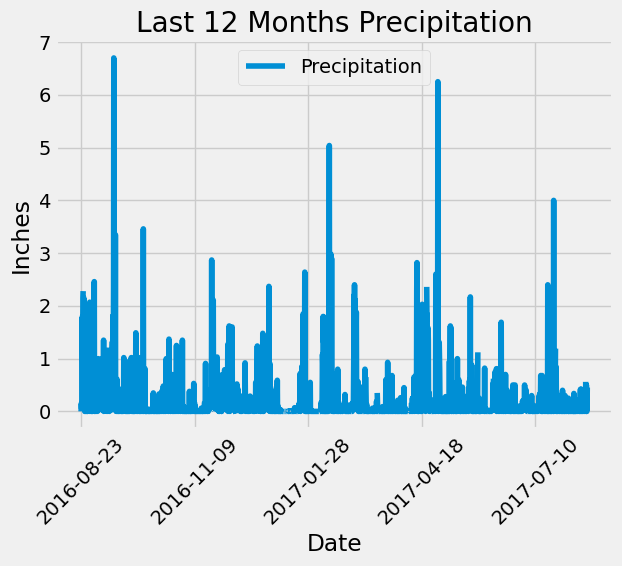

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
retrieved_scores = session.query(Measurement.date, Measurement.prcp) \
    .filter(Measurement.date >= prev_year) \
    .order_by(Measurement.date) \
    .all()

# Extract date and precipitation data into separate lists
dates = [row.date for row in retrieved_scores]
precipitations = [row.prcp for row in retrieved_scores]

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame({'Date': dates, 'Precipitation': precipitations})

# Sort the dataframe by date
df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()
plt.title('Last 12 Months Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(["Precipitation"], loc='upper center')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(func.count(Station.name)).scalar()

print(f"Total number of stations: {station_count}")


Total number of stations: 9


In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()

for station, count in station_activity:
    print(f"Station: {station}, Count: {count}")
    

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()


[(53.0, 87.0, 73.09795396419437)]

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temp = session.query(Measurement.station, Measurement.tobs) \
    .filter(Measurement.station == "USC00519281") \
    .filter(Measurement.date >= prev_year) \
    .all()

# Convert the query results into a DataFrame
last_year_temp_df = pd.DataFrame(last_year_temp, columns=['date', 'tobs'])

last_year_temp_df.head()


,date,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


Text(0.5, 1.0, 'Temperature Observation for the Last 12 Months')

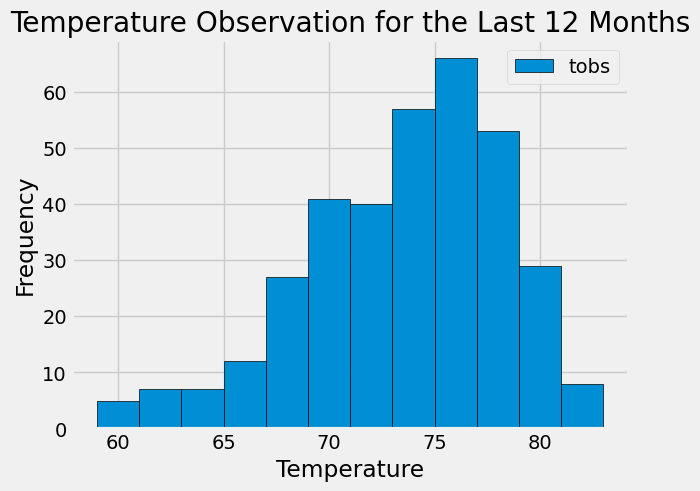

In [56]:

# plot the results as a histogram

last_year_temp_df.plot.hist(bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation for the Last 12 Months')


# Close Session

In [57]:
# Close Session
session.close()